# Assiomi

Sia $\mathbb T^i =  \{T^i_1,T^i_2,...,T^i_{N_i}\}$ l'insieme delle variabili temporali del $\textbf{MatrixMult}$ $i-$esimo

Sia $\mathbb T^i_{\text{reg}} \subset \mathbb T^i$ l'insieme delle variabili temporali storate in registri nel $\textbf{MM}_ i$ <br>
e sia $\mathbb T^i_{\text{mem}}$ l'insieme delle variabili temporali storate in memoria. <br>
Si noti che $\mathbb T^i_{\text{reg}} \cup \mathbb T^i_{\text{mem}} = \mathbb T^i $ , $\mathbb T^i_{\text{reg}} \cap \mathbb T^i_{\text{mem}} = \emptyset$ <br>
Chiamiamo $\{  \mathbb T^i_{\text{reg}}, \mathbb T^i_{\text{mem}}\}$ $\textbf{partizione registri memoria}$ e la denotiamo come $\mathcal P^i_{MR}$

Contemporaneamente, sia $\mathbb T^i_{in} \subset \mathbb T^i$ l'insieme delle variabili temporali che contengono l'input del $\textbf{MM}_i$ <br>
e  $\mathbb T^i_{out}$ quelle dell'output. <br>
Chiamiamo $\{ \mathbb T^i_{\text{in}} , \mathbb T^i_{\text{out}}  \}$ $\textbf{partizione input output}$ e la denotiamo come $\mathcal P^i_{IO}$

Denotiamo con $\mathbb M$ l'insieme degli indirizzi di memoria

Denotiamo con $\mathbb D$ l'insieme dei registri

# Mapping

Definiamo una famiglia di funzioni invertibili $\left\{ \phi^{i+1}_{i} : \mathbb T^i_{out} \rightarrow \mathbb T^{i+1}_{in} \right\}_i$ che associano ad ogni variabile temporale di output, la variabile temporale di input corrispondente nel matrix mult successivo.

Data $\phi_x^y$ denotiamo come $\phi_y^x$ la sua inversa

Sia $m_i : \mathbb T_{mem}^i \rightarrow \mathbb M$ la funzione che associa ogni variabile temporale ad un indirizzo di memoria

Sia $r_i : \mathbb T_{reg}^i \rightarrow \mathbb D$ la funzione che associa ogni variabile temporale ad un indirizzo di memoria

Supponiamo $m_i,r_i$ nota a priori. (ottimizzazione libera del primo matrixmult)

Vogliamo definire $m_{i+1}, r_{i+1}$ tale che 

1.  $m_{i} |_{
T \ \in \ \mathbb T_{mem}^{i} \ : \ T \ \in \ 
\mathbb T^{i}_{out} \cap \mathbb T^{i}_{mem} \land \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \phi_i^{i +1}T \ \in  \ \mathbb T^{i+1}_{in} \cap \mathbb T^{i+1}_{mem} 
} 
= 
\left\{ \phi_i^{i+1} \circ m_{i+1} \right\}
|_{
T \ \in \ \mathbb T_{mem}^{i} \ : \ T \ \in \ 
\mathbb T^{i}_{out} \cap \mathbb T^{i}_{mem} \land \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \phi_i^{i +1}T \ \in  \ \mathbb T^{i+1}_{in} \cap \mathbb T^{i+1}_{mem} 
}
$ // le variabili che restano in memoria non devono cambiare di indirizzo

2. 
$r_{i} |_{
    T \ \in \ \mathbb T_{reg}^{i} \ : \ 
        \phi_{i}^{i+1}T \ \in \ 
                    \mathbb T^{i + 1}_{reg} \cap \mathbb T^{i + 1}_{in}
    \land
    \\
    \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
        T \ \in \ 
            \mathbb T_{reg}^{i} \cap \mathbb T_{out}^{i}
}
=
\{
\phi_{i}^{i+1} \circ r_{i+1}
\} |_{
    T \ \in \ \mathbb T_{reg}^{i} \ : \ 
        \phi_{i}^{i+1}T \ \in \ 
                    \mathbb T^{i + 1}_{reg} \cap \mathbb T^{i + 1}_{in}
    \land
    \\
    \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
        T \ \in \ 
            \mathbb T_{reg}^{i} \cap \mathbb T_{out}^{i}
}
$ // le variabili che restano nei registri non devono muoversi

3. $ m_{i+1}|_{
     T  \ \in \ 
     \mathbb T^{i + 1}_{mem} 
     \cap
     \mathbb T^{i + 1}_{in} 
     \ : \
     \phi_{i+1}^{i}(T) \ \in 
     \mathbb T^{i}_{reg}
     \cap
     \mathbb T^{i}_{out} 
} 
\text{
is "optimal"
}
$

4. $m_{i + 1}|_{
    T \in \mathbb T^{i + 1}_{out} \cap \mathbb T^{i + 1}_{mem}
} \text{
is "optimal" 
}$

5. $r_{i + 1} |_{
    T \in \mathbb T^{i+1}_{in} 
    \cap
    \mathbb T^{i + 1}_{reg} :
    \phi_{i + 1}^{i}T
    \ \in \
    \mathbb T^{i}_{mem} 
    \cap
    \mathbb T^{i}_{out}
}$

# Memory allocation pseudocode

$
\text{$m_1,r_1 \leftarrow  $ Annealing, StatAlloc }
\\
\text{$\bf for$ $i \in [2,|MM|]:$ }
\\
\hspace{2em}\text{/* Define Partitions for current Matrix Mult */}
\\
\hspace{2em}\text{$\mathbb T^i_{in}, \mathbb T^i_{out} \leftarrow \mathcal P_{IO}(\mathbb T^i)$}
\\
\hspace{2em}\text{$\mathbb T^i_{mem}, \mathbb T^i_{reg} \leftarrow \mathcal P_{MR}(\mathbb T^i)$}
\\
\hspace{2em}\text{/* Retrieve Partitions for previous Matrix Mult */}
\\
\hspace{2em}\text{$\mathbb T^{i-1}_{in}, \mathbb T^{i-1}_{out} \leftarrow \mathcal P_{IO}(\mathbb T^{i-1})$}
\\
\hspace{2em}\text{$\mathbb T^{i-1}_{mem}, \mathbb T^{i-1}_{reg} \leftarrow \mathcal P_{MR}(\mathbb T^{i-1})$}
\\ 
\hspace{2em}\text{/* Define mapping $\phi$ and $\phi^{-1}$ */}
\\
\hspace{2em}\text{$\phi_{i-1}^{i} \leftarrow ( \mathbb T^{i -1}_{out} \mapsto  \mathbb T^{i}_{in} ) $}
\\
\hspace{2em}\text{$\phi_{i}^{i-1} \leftarrow ( \mathbb T^{i}_{in} \mapsto  \mathbb T^{i-1}_{out} ) $}
\\
\hspace{2em} \text{/* Define flows */}
\\
\hspace{2em} flows_{i-1}^{i} \leftarrow \{\}
\\
\hspace{2em}\text{/* Define $r_i$ */}
\\ 
\hspace{2em}\text{$FreeRegisters \leftarrow \mathbb D$} \\
\hspace{2em}\text{$r_i \leftarrow \{ \}$}
\\ \text{ } \\
\hspace{2em}\text{// if something some output stays in registers when becomes input we dont want to move it}
\\
\hspace{2em} {\bf for} \ t \in \left( \mathbb T^{i}_{in} \cap \mathbb T^{i}_{reg} \right)
\\
\hspace{4em} {\bf if } \ \phi_{i}^{i-1}(t) \in \left( \mathbb T^{i-1}_{out} \cap \mathbb T^{i-1}_{reg} \right) 
\text{ // corresponding output was in registers }
\\
\hspace{6em} r_i.insert( \left( t , r_{i-1}(t) \right) )
\\
\hspace{6em} FreeRegisters.remove( r_{i-1}(t) )
\\
\hspace{2em} {\bf for} \ t \in \left( \mathbb T^{i}_{in} \cap \mathbb T^{i}_{reg} \right)
\\
\hspace{4em} {\bf if } \ \phi_{i}^{i-1}(t) \in \left( \mathbb T^{i-1}_{out} \cap \mathbb T^{i-1}_{mem} \right)
\text{ // corresponding output was in memory }
\\
\hspace{6em} r \leftarrow \text{choose a register from $FreeRegisters$}
\\
\hspace{6em} r_i.insert( (t,r) ) 
\\
\hspace{6em} FreeRegisters.remove( r )
\\
\hspace{6em} flows_{i-1}^{i}.push( Flow( m_{i-1}(\phi_{i}^{i - 1}(t)) \mapsto r ) )
$

$
\hspace{2em} \text{/* Define $m_i$ */}
\\
\hspace{2em} m_i \leftarrow \{\}\\
\hspace{2em} \text{/* Define the list of "free" temporaries, in the sense that they have no constraint on memory position */}
\\
\hspace{2em} UnconstrainedTemps \leftarrow \mathbb T^{i}_{mem}
\\
\hspace{2em} ConstrainedTemps \leftarrow \mathbb \{\}
\\
\text{ }
\\
\hspace{2em} (\star) \ \ \  \text{/* Constraint the position in memory of what was previously in memory */}
\\
\hspace{2em} {\bf for} \ t \in \left( \mathbb T^{i}_{in} \cap \mathbb T^{i}_{mem} \right)
\\
\hspace{4em} {\bf if } \ \phi_{i}^{i-1}(t) \in \left( \mathbb T^{i-1}_{out} \cap \mathbb T^{i-1}_{mem} \right) 
 \hspace{2em} \text{ // corresponding output was in memory }
\\
\hspace{6em} m_i.insert( \left( t , m_{i-1}(t) \right) ) \hspace{2em} \text{ // fix the constrained addresses}
\\
\hspace{6em} UnconstrainedTemps.remove(t)
\\
\hspace{6em} ConstrainedTemps.insert(t)
\\
\hspace{2em} \text{ /* Find $m_i(\mathbb T^{i}_{mem})$ image of the temps throu the map such that is "as dense as possible" */}
\\
\\
\hspace{2em} m_i(\mathbb T^{i}_{mem}) \leftarrow MovingWindowDensityOptimization(
\\ \hspace{12em} (ConstrainedTemps , \underbrace{ m_i(ConstrainedTemps) }_{
        \text{We know these from } \star
    }),
\\ \hspace{12em} UnconstrainedTemps
\\ \hspace{12em})
\\ \hspace{2em} 
\\
\hspace{2em} \gamma(Permutation \ p) \leftarrow \text{Returns the mapping between UnconstrainedTemps and $m^{i}(\mathbb T^i_{mem})$ induced by the permutation}
\\
\hspace{2em}  P \leftarrow \text{ permutation obtained thru annealing}
\\
\hspace{2em} \text{${\bf for} \  u \  \in \ UnconstrainedTemps$} 
\\
\hspace{4em} m_i.insert( ( u, \gamma(P)(u)) )
\\
\hspace{2em} \text{/* Define the flows from registers in previous output to memory in current input */}
\\
\hspace{2em} {\bf for} \ t \in \left( \mathbb T^{i}_{in} \cap \mathbb T^{i}_{mem} \right)
\\
\hspace{4em} {\bf if } \ \phi_{i}^{i-1}(t) \in \left( \mathbb T^{i-1}_{out} \cap \mathbb T^{i-1}_{reg} \right)
\\
\hspace{6em} flows_{i-1}^{i}.push( Flow( r_{i-1}(\phi_{i}^{i - 1}(t)) \mapsto  m_{i}(t) ) )
$

# MovingWindowDensityOptimization 
Short graphical explanation
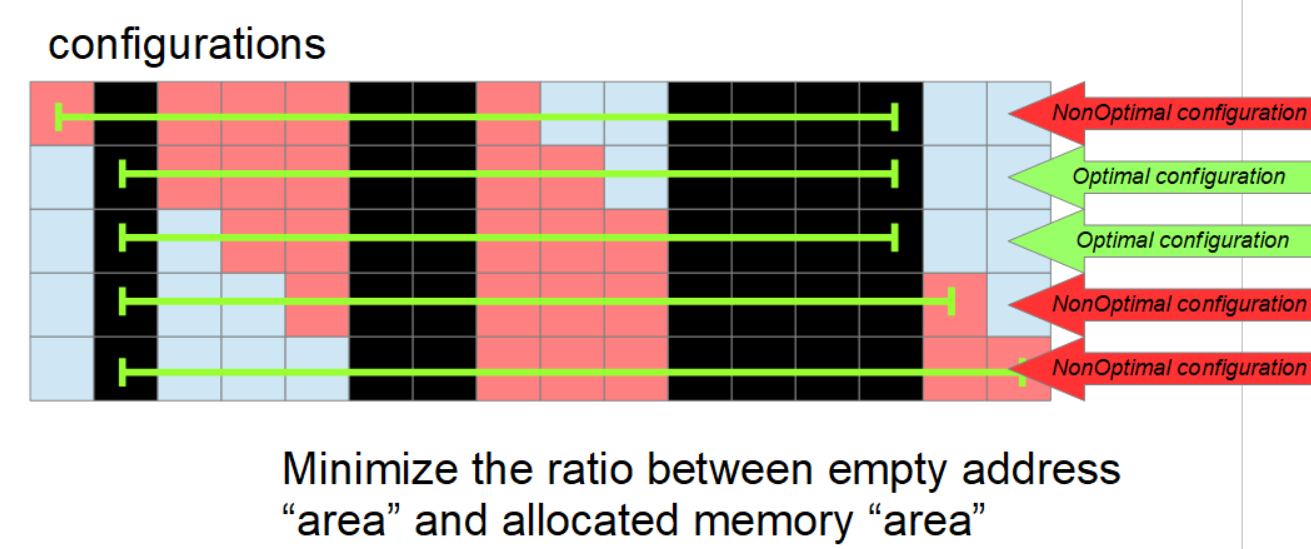

# Permutation Optimization

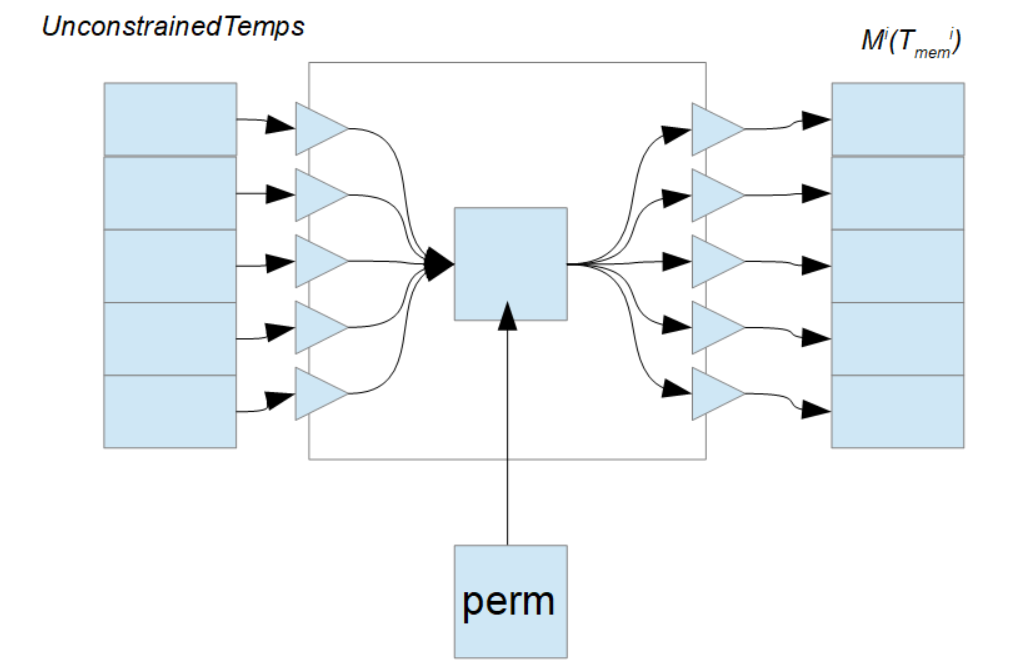